# HW 8: SVMs, kNN, and Random Forest for handwriting recognition
In this homework, you will use SVMs, kNN, and Random Forest algorithms for handwriting recognition, and compare their performance with the naïve Bayes and decision tree models you’ve built in previous week.

Steps:
1.	Describe data pre-processing steps and the chosen evaluation method and measure(s) (accuracy would be enough in this case)

2.	Use the train set to build kNN, SVM, and Random Forest models. Report test performance, compare them, and use the theoretic knowledge to explain whether the algorithm performance difference makes sense or not.

3.	Write a report to describe what you did, including the data preparation, transformation, algorithm tuning, the generated models and their performance. In the end, summarize which model works the best and why.

4.	If you use Weka to do the experiment, write your report in Microsoft Word. Up to 8 pages.

5.	If you use R, use R Markdown tool to prepare your document and output to Word. Don't print out excessively large amount of output, such as prediction results, or the entire dataset. 

#### Load the packages:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

#### We are loading the train and test dataset with our datasets and performing EDA:

In [3]:
#Load train and test dataset:
train = pd.read_csv("digit-train.csv")
test = pd.read_csv("digit-test.csv")

In [4]:
train.shape

(4198, 785)

In [5]:
test.shape

(4198, 785)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### We are checking if train and test dataset have any null values.

In [8]:
train.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [9]:
test.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

It turns out that there are no missing values in the dataset.

#### Now let us check the values present in the train and test dataset:

In [10]:
train.describe() #We use the describe() function to check the statistical values in the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,4198.000000,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,...,4198.000000,4198.000000,4198.000000,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0
mean,4.429014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.294426,0.151263,0.070272,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.866764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.908159,5.798025,3.409760,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,4198.000000,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,4198.0,...,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.0,4198.0,4198.0,4198.0,4198.0
mean,4.409004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218676,0.074559,0.060029,0.042163,0.005241,0.0,0.0,0.0,0.0,0.0
std,2.866115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.933038,2.496968,3.889371,2.731820,0.339548,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,114.000000,252.000000,177.000000,22.000000,0.0,0.0,0.0,0.0,0.0


#### Now let us check what is present in the dataset:

In [12]:
# Let us check the dimensions
print("Dimensions: ",train.shape, "\n")

# The data types
print(train.info())

# And the head
train.head()

Dimensions:  (4198, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 25.1 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now let us do the same for the test dataset:

In [13]:
# Dimensions:
print("Dimensions: ",test.shape, "\n")

# Data Types:
print(test.info())

# Head:
test.head()

Dimensions:  (4198, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 25.1 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that we have 4198 rows and 785 columns in each of the datasets.

In [14]:
#We are checking the distinct labels in order. We can see numbers ranging from 0-9.
order = list(np.sort(train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### We are visualizing the number of class and counts in the datasets:

/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    471
8    438
7    436
3    425
4    420
0    418
6    416
2    413
5    390
9    371
Name: label, dtype: int64

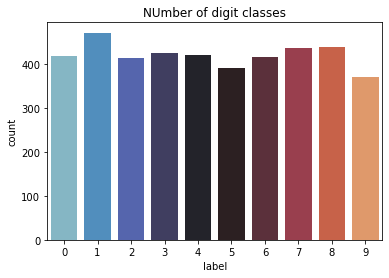

In [15]:
plt.plot(figure = (16,10))
g = sns.countplot( train["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train.label.astype('category').value_counts()

We can observe that indeed, 0 and 9 have the lowest number of counts whereas 1 has the highest number of them.

#### Plotting some samples as well as converting into matrix:

Text(0.5, 1.0, 'Digit 2')

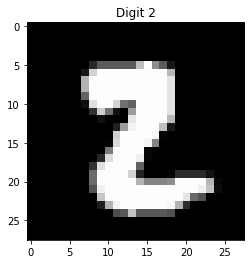

In [16]:
four = train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 2")

In [17]:
train.iloc[3:,1].shape

(4195,)

Text(0.5, 1.0, 'Digit 7')

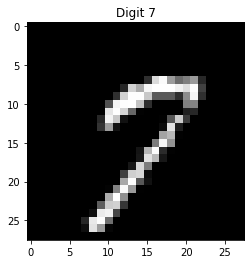

In [18]:
seven = train.iloc[7, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [19]:
# I wanted to check the average feature values:
round(train.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

## Data Preparation for ML Classification:

#### Step 1 : Splitting the dataset into X and Y variable:

In [20]:
## Separating the X and Y variable
y = train['label']
## Dropping the variable 'label' from X variable 
X = train.drop(columns = 'label')
## Printing the size of data 
print(train.shape)

(4198, 785)


#### Step 2: Normalize and scale the X dataset:

In [21]:
## Normalization
X = X/255.0
test = test/255.0
print("X:", X.shape)
print("test:", test.shape)

X: (4198, 784)
test: (4198, 785)


In [22]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

We will now put these X_train and y_train values into each of the three classifiers.

## Classifier 1: Support Vector Machines

We will be using the linear as well as the rbf model:
#### Linear model:

In [23]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [24]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8738095238095238 

[[126   0   1   1   0   1   2   0   2   0]
 [  0 143   0   0   0   0   1   0   2   0]
 [  0   1 107   3   5   0   7   0   6   0]
 [  0   0  12 100   0   7   0   0   3   1]
 [  1   2   1   0 106   0   0   0   0   8]
 [  0   1   0   6   3 100   5   1   7   0]
 [  3   0   0   1   1   1 114   0   1   0]
 [  2   1   6   0   2   3   0 122   0   7]
 [  1   7   3   6   1   8   1   0  83   1]
 [  2   1   0   2   6   0   0   2   0 100]]


The linear model gives approx. 87% accuracy. Let's look at a sufficiently non-linear rbf model with randomly chosen hyperparameters.

#### Non-linear model:

In [25]:
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [26]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8722222222222222 

[[125   0   0   0   2   1   2   0   3   0]
 [  0 144   0   0   1   0   0   0   1   0]
 [  0   1 112   3   3   0   7   0   3   0]
 [  0   0  10  96   0   6   0   3   6   2]
 [  0   0   7   0 106   0   1   0   0   4]
 [  0   0   5   4   3 103   3   0   5   0]
 [  2   0   9   0   0   1 109   0   0   0]
 [  1   2  13   0   2   1   0 117   0   7]
 [  2   0   3   6   1   5   1   0  91   2]
 [  0   1   3   1   4   1   0   6   1  96]]


## Classifier 2: KNNs

We are trying to reduce the dimensionality of the X_train dataset using PCA into only 2 components:

In [27]:
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

X_pca.shape

(839, 2)

I decided to use GridSearchCV to decide the hyperparameters for KNN. In the following code, I add all my n_neighbors and my minkowski metrics in a list of parameters:

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [2, 3, 4, 5],
              'metric': ["euclidean", "manhattan", "minkowski"]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}


Now, I pass the KNN classifier, apply the parameters, perform 5 folds and score the performance based on its accuracy:

In [29]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=6), param_grid, cv=5,
                          return_train_score=True, scoring='accuracy')

In [30]:
grid_search.fit(X_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=6),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5]},
             return_train_score=True, scoring='accuracy')

In [31]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best cross-validation score: 0.32


I am tuning the hyperparameters as follows: I am using the number of neighbors (n_neighbors) as 5 and using Manhattan Distance (p=1). This is handled by **grid_search.best_params_

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(**grid_search.best_params_)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_pred = classifier.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

[[125   0   0   0   2   1   2   0   3   0]
 [  0 144   0   0   1   0   0   0   1   0]
 [  0   1 112   3   3   0   7   0   3   0]
 [  0   0  10  96   0   6   0   3   6   2]
 [  0   0   7   0 106   0   1   0   0   4]
 [  0   0   5   4   3 103   3   0   5   0]
 [  2   0   9   0   0   1 109   0   0   0]
 [  1   2  13   0   2   1   0 117   0   7]
 [  2   0   3   6   1   5   1   0  91   2]
 [  0   1   3   1   4   1   0   6   1  96]]
accuracy: 0.834920634920635


The accuracy of the KNN model turns out to be 83.49%

## Classifier 3: Random Forests

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Create a based model
rf = RandomForestClassifier(max_depth=6, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=200)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=12,
                       n_estimators=200)

In [46]:
y_pred_rf = rf.predict (X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred_rf))

[[126   1   1   1   0   3   1   0   0   0]
 [  0 146   0   0   0   0   0   0   0   0]
 [  5  20  88   6   1   1   2   3   1   2]
 [  1   7   2  99   0   5   0   2   6   1]
 [  1   9   0   0  97   0   0   1   0  10]
 [  0   8   0  13   1  95   2   0   1   3]
 [  2   5   0   0   0   1 113   0   0   0]
 [  0  11   0   1   2   1   0 115   0  13]
 [  1   8   1  10   3   6   4   0  76   2]
 [  0   3   0   1   9   0   0   3   0  97]]
0.8571428571428571


The accuracy is nearly an 85.71%

*Conclusion:*
After calculating all the three different classifiers including their subtypes, we can conclude that Linear SVM provides an 87.33% accuracy, out of Kernel SVM with 87.22%, KNN with 83.49% and Random forest of 85.71%.